In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
test = pd.read_csv('SalaryData_Test.csv')
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
train = pd.read_csv('SalaryData_Train.csv')
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            2998 non-null   int64 
 1   workclass      2998 non-null   object
 2   education      2998 non-null   object
 3   educationno    2998 non-null   int64 
 4   maritalstatus  2998 non-null   object
 5   occupation     2998 non-null   object
 6   relationship   2998 non-null   object
 7   race           2998 non-null   object
 8   sex            2998 non-null   object
 9   capitalgain    2998 non-null   int64 
 10  capitalloss    2998 non-null   int64 
 11  hoursperweek   2998 non-null   int64 
 12  native         2998 non-null   object
 13  Salary         2997 non-null   object
dtypes: int64(5), object(9)
memory usage: 328.0+ KB


In [7]:
train1 = train.iloc[:,0:13]
train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-State,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,31,10,0,0,43,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2994,36,12,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2995,31,13,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2996,30,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
test1 = test.iloc[:,0:13]
test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
train_scaler = pd.DataFrame(trans.fit_transform(train1))
test_scaler = pd.DataFrame(trans.fit_transform(test1))

In [10]:
pca_train = PCA(n_components = 102)
pca_train_values = pca_train.fit_transform(train_scaler)
var = pca_train.explained_variance_ratio_
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 18.89,  27.12,  34.  ,  39.74,  44.71,  49.31,  53.63,  57.13,
        60.24,  63.12,  65.76,  68.23,  70.5 ,  72.55,  74.48,  76.29,
        77.94,  79.54,  80.87,  82.13,  83.28,  84.39,  85.39,  86.33,
        87.25,  88.11,  88.9 ,  89.66,  90.4 ,  91.12,  91.83,  92.48,
        93.11,  93.73,  94.32,  94.79,  95.21,  95.62,  96.  ,  96.35,
        96.68,  96.99,  97.25,  97.49,  97.72,  97.93,  98.11,  98.24,
        98.36,  98.47,  98.56,  98.65,  98.73,  98.81,  98.89,  98.96,
        99.03,  99.1 ,  99.17,  99.23,  99.29,  99.35,  99.4 ,  99.45,
        99.49,  99.53,  99.57,  99.61,  99.65,  99.68,  99.71,  99.74,
        99.77,  99.79,  99.81,  99.83,  99.85,  99.87,  99.89,  99.9 ,
        99.91,  99.92,  99.93,  99.94,  99.95,  99.96,  99.97,  99.98,
        99.99, 100.  , 100.01, 100.02, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03, 100.03, 100.03, 100.03, 100.03])

In [11]:
pca_test = PCA(n_components = 102)
pca_test_values = pca_test.fit_transform(test_scaler)

In [12]:
finaltrain = pd.concat([pd.DataFrame(pca_train_values[:,0:50]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,0.479219,-0.691363,0.882939,0.930899,0.206845,-0.195920,-0.000922,-0.207168,-0.138844,-0.316173,...,0.023309,0.008903,0.031494,-0.029931,0.010473,-0.009868,0.005574,0.012307,0.018481,<=50K
1,-1.242194,0.244052,0.802191,0.510633,0.339503,-0.216737,0.106310,0.221408,-0.730453,-0.461332,...,0.048833,-0.196621,-0.142212,0.211895,-0.050430,0.038260,0.011702,-0.002559,-0.019701,<=50K
2,0.389736,-0.337456,-0.687566,0.837395,-0.839339,0.346488,-0.048726,0.281464,-0.053135,0.069301,...,-0.020058,-0.030723,-0.030491,0.023194,-0.021878,0.001298,-0.011234,0.018108,-0.007026,<=50K
3,-0.850779,-0.034060,-0.341926,-0.526119,0.253621,0.314438,1.172914,-0.155775,0.204180,0.101422,...,0.050905,-0.004993,-0.024587,-0.071739,-0.038953,-0.035743,-0.034634,-0.012617,-0.006597,<=50K
4,0.330516,1.055349,0.548317,-0.539960,0.257244,-0.706454,1.427800,-0.275678,0.544473,0.246926,...,-0.315904,-0.081569,0.038381,-0.012011,0.059403,0.050583,-0.065177,-0.065226,-0.014138,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1.415182,-0.044249,0.458666,-0.448860,-0.298960,0.245824,-0.474411,-0.784692,0.038698,-0.405038,...,-0.009025,0.031059,0.012023,-0.038394,0.006268,-0.000133,-0.002396,-0.003577,-0.004954,<=50K
2994,0.081187,-0.230977,0.600479,0.960238,-0.151659,0.448485,0.003816,0.009475,-0.483846,-0.565597,...,-0.075784,-0.093022,0.015102,0.008821,0.005578,-0.013072,0.017722,0.004699,-0.036979,<=50K
2995,-1.093982,0.021999,0.484608,-0.163876,-0.418668,-0.540811,0.414644,0.298786,-0.577837,-0.578259,...,-0.016595,0.073127,0.046582,-0.069700,0.013189,0.011686,-0.008677,-0.002941,-0.032076,>50K
2996,-1.031668,-0.032635,0.366190,-0.229847,-0.354291,-0.551706,0.288437,0.167528,-0.098883,-0.001729,...,-0.011973,-0.001026,-0.014787,0.034500,-0.016387,0.027026,0.000457,0.001538,-0.010699,<=50K


In [13]:
finaltest = pd.concat([pd.DataFrame(pca_test_values[:,0:50]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Salary
0,0.544139,-1.082697,0.043718,-0.638660,0.600414,-0.037211,1.117301,0.303058,0.089471,-0.027091,...,-0.039742,-0.026572,0.067608,-0.043980,-0.048214,-0.031360,-0.005013,-0.000361,-0.008008,<=50K
1,-1.017577,-0.173468,-0.721000,0.034038,-0.051207,-0.169266,-0.173861,-0.133687,-0.010559,0.008086,...,-0.028487,0.020086,-0.024653,0.019499,-0.001208,0.038778,0.010639,-0.016478,-0.012826,<=50K
2,-1.079069,0.331812,0.385397,0.156170,0.541402,0.179608,-0.124271,-0.014775,-0.098975,-0.068643,...,-0.010730,-0.047369,-0.047461,0.084653,0.013472,0.011303,0.007996,-0.008328,0.003764,>50K
3,-0.846450,-0.012312,-0.003005,-0.778263,-0.161833,0.679751,1.182308,-0.408033,0.064636,0.140687,...,0.007125,-0.013947,-0.018003,0.047481,-0.018848,-0.019185,-0.000007,-0.003100,0.063413,>50K
4,0.613603,-0.980319,0.315324,0.309863,-0.254993,0.026711,0.039416,-0.213736,-0.160857,-0.153713,...,0.001472,0.000903,-0.034617,0.029876,0.001334,-0.026582,0.018164,0.016502,0.001699,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.392559,-0.799233,0.857450,-0.224953,0.264490,-0.949432,0.035834,0.698898,-0.383183,-0.172809,...,-0.006333,-0.000722,0.014517,-0.059677,-0.059991,-0.009347,0.002798,-0.000091,-0.015655,<=50K
15056,1.064367,0.803553,0.497037,0.719569,-0.820526,-0.579177,0.120411,0.287500,-0.512440,0.030903,...,0.017556,-0.012311,-0.049600,0.014514,-0.006896,0.001337,-0.004356,-0.017986,-0.006914,<=50K
15057,-1.022440,0.211868,0.552672,-0.053465,-0.327323,-0.844022,0.221308,0.212895,-0.480768,-0.051884,...,-0.003702,-0.002894,0.011435,-0.056956,-0.061227,-0.004168,0.002539,0.004180,-0.015829,<=50K
15058,0.346779,-0.164803,0.224122,-0.087735,-0.083448,-0.185222,0.845949,0.963429,0.287051,0.031549,...,0.051194,-0.243051,0.133580,0.050948,-0.039688,-0.082235,0.025593,0.039421,-0.031407,<=50K


In [14]:
array = finaltrain.values
X = array[0:2000:,0:50]
Y = array[0:2000:,50]

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [16]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.8305
{'n_neighbors': 29}


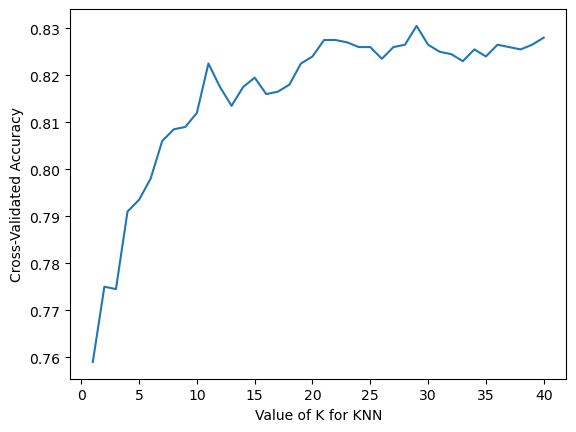

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range = range(1, 41)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [20]:
num_folds = 10
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=29)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8234999999999999


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [22]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [23]:
gsv.best_params_ , gsv.best_score_ 

({'C': 13, 'gamma': 0.5, 'kernel': 'rbf'}, 0.792)

In [24]:
array1 = finaltest.values
x = array1[0:2000:,0:50]
y = array1[0:2000:,50]

In [25]:
clf = SVC(C= 15, gamma = 50)
clf.fit(x , y)
y_pred = clf.predict(x)
acc = accuracy_score(y, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y, y_pred)

Accuracy = 98.45


array([[1500,    6],
       [  25,  469]], dtype=int64)

In [26]:
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = KFold(n_splits=15)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8110013840571578


In [27]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 200
max_features = 4
kfold = KFold(n_splits=15)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8114951557999477


In [31]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 200
seed=7
kfold = KFold(n_splits=15)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8150226312048778
